# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [188]:
# Импорт библиотек
import pandas as pd # для работы с DataFrame 
import numpy as np # для работы с массивами
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

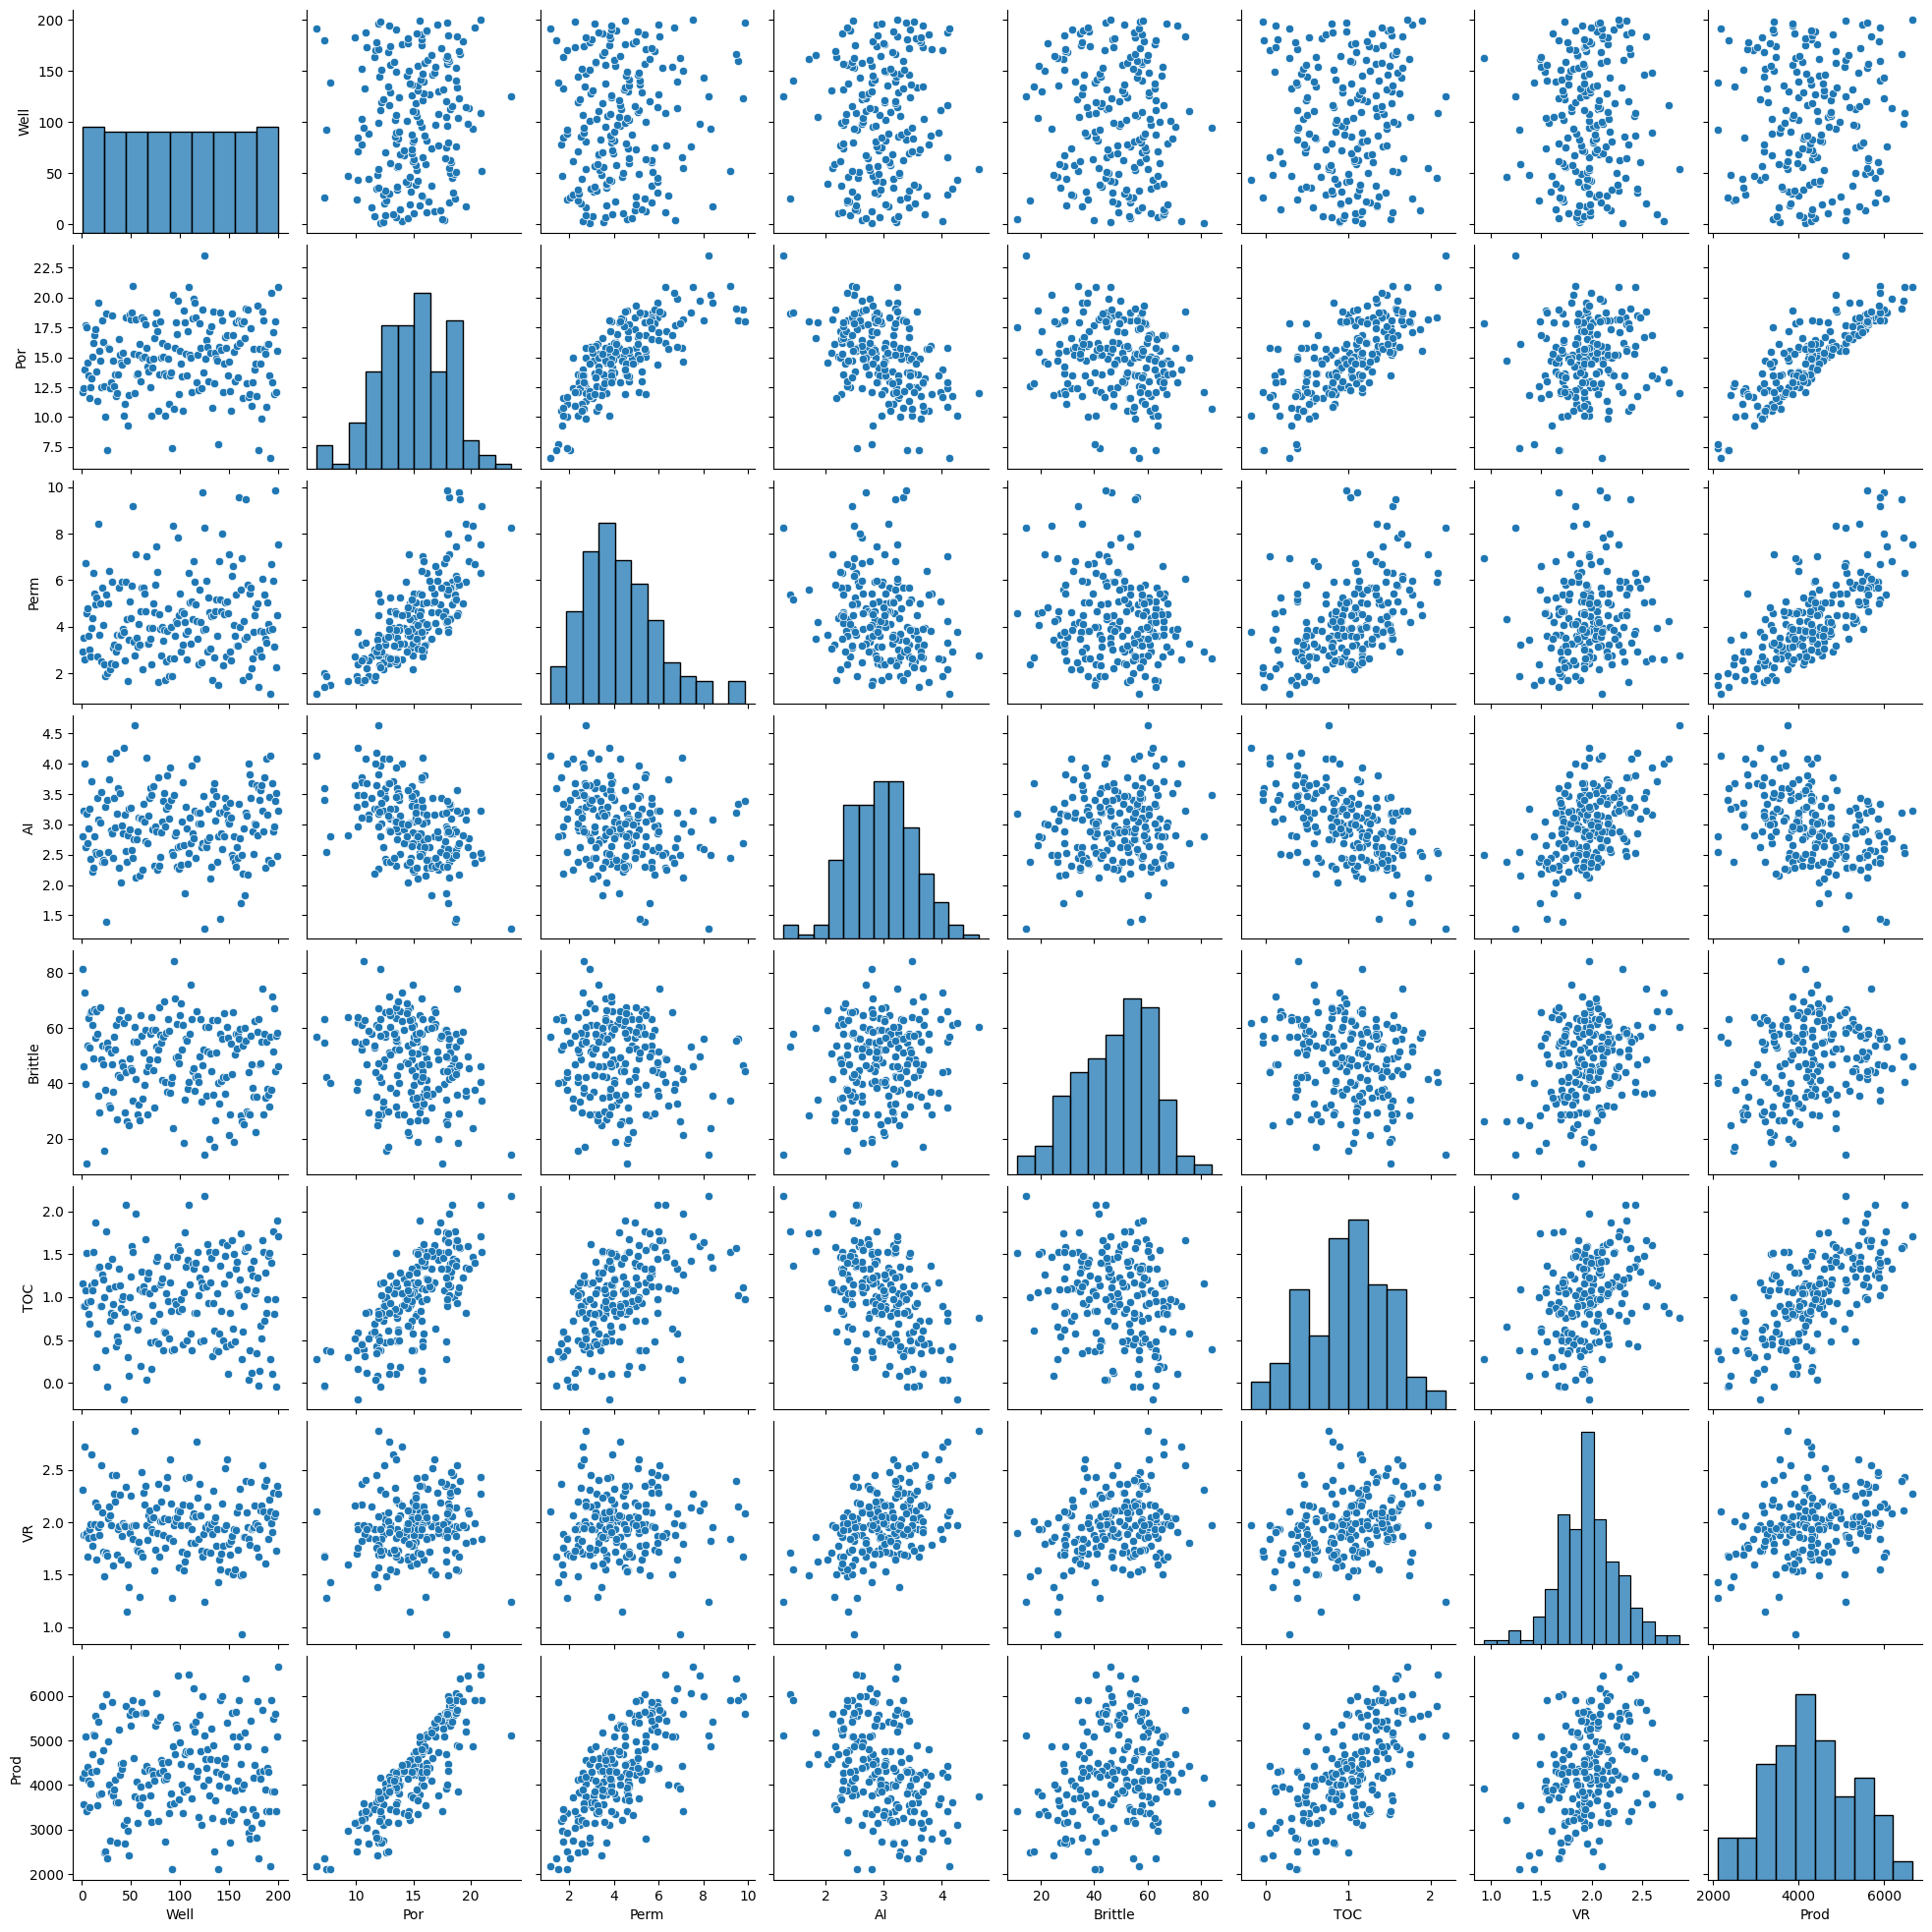

In [3]:
# Ваш код здесь
import seaborn as sns

sns.pairplot(data)

По графикам можем наблюдать близкую к линейной зависимости добычи газа (млн куб. футов) от таких параметров, Por (пористость скважины, %) и Perm (проницаемость скажины). Также с некоторым разбросом прослеживается прямая зависимость от параметра TOC (общий органический углерод, %).ё
Глянем на корреляционную матрицу:

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг корреляционной матрицы:  8
Ранг корреляционной матрицы (без целевой переменной):  7
Определитель корреляционной матрицы:  0.0007299


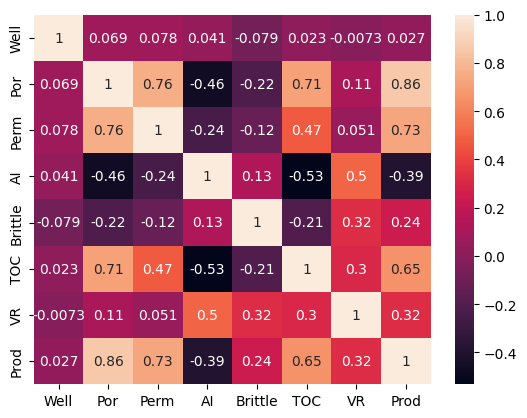

In [20]:
# Ваш код здесь
# расчёт корреляционной матрицы
corr_data = data.corr()
corr_features_only = data.iloc[:, :-1].corr()
# визуализация корреляционной матрицы в виде тепловой карты
sns.heatmap(data.corr(), annot=True);
print('Ранг корреляционной матрицы: ', np.linalg.matrix_rank(corr_data))
print('Ранг корреляционной матрицы (без целевой переменной): ', np.linalg.matrix_rank(corr_features_only))
print('Определитель корреляционной матрицы: ', f'{np.linalg.det(corr_data):.7f}')

> *Ваши выводы здесь*

- <u>*Какие факторы сильнее всего коррелируют с целевой переменной?*</u>

<div style='background-color: rgb(100,100,100);'>Согласно корреляционной матрице большие коэффициенты корреляции с целевой переменной добычи газа (млн куб. футов) имеют признаки Por (пористость скважины, %) и Perm (проницаемость скажины), 0.86 и 0.73 соотвественно. Также прослеживается умеренная прямая зависимость от параметра TOC (общий органический углерод, %), 0.65. И напоследок, имеется очень слабая обратная связь целевой переменной с признаком AI (акустический импеданс, $кг/м^2 * 10^6$), -0.39.</div>

- <u>*Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?*</u>

<div style='background-color: rgb(100,100,100);'>Определитель матрицы близок к нулю (0.0007), но он не равен 0, поэтому матрица не плохо обусловленная и есть возможность получения обратной матрицы.</div>

- <u>*Что вы можете сказать о наличии коллинеарности/мультиколлинеарности в данных?*</u>

<div style='background-color: rgb(100,100,100);'>Несмотря на то, что ранг матрицы максимален (8), равно максимальному количеству столбцов/векторов в системе,  и матрица не вырождена, в матрице корреляций можем заметить значительные коэффициенты корреляции (>0.7) между признаками/факторами/фичами, тем самым можно говорить о возможности коллинеарности/мультколлинеарности.</div>

- <u>*Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?*</u>

<div style='background-color: rgb(100,100,100);'>Метод наименьших квадратов подразумевает операции с обратной матрицей, т.к. определитель матрицы не равен нулю, то обратная матрица существует и поэтому модель классической линейной регрессии по методу наименьших квадратов применима к данному датасету.</div>



### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [187]:
# Ваш код здесь
# инициализируем вектор x0 со значениями 1 для нахождения w0
x0 = np.ones((data.shape[0],1))
# преобразуем датафрейм с признаками в numpy матрицу
X = data.iloc[:, :-1].values
# объединим вектор x0 с  матрицей признаков
A = np.hstack([x0, X])
# преобразуем значения целевой переменной в numpy вектор
y = data.iloc[:, -1].to_numpy()

w = np.linalg.inv(A.T@A)@A.T@y
# Вывод на экран полученных оценок коэффициентов модели, округлённых до целого.
print(*[f'w{i}: {int(w)}' for i, w in enumerate(w)], sep='\n')

w0: -1232
w1: 0
w2: 230
w3: 116
w4: -365
w5: 24
w6: -78
w7: 785


> *Ваши выводы здесь*
- <u>*Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?*</u>
<div style='background-color: rgb(100,100,100);'>Да, признак под номером 1 - Well (идентификатор скважины) имеет вес равен нулю, таким образом он не оказывает воияние на целевую переменную (что логично, т.к. номер скважины не определяет дебит скважины). Признаком, которые оказывают шумовое влиянием с некоторой долей вероятности может быть 7й признак VR — коэффициент отражения витринита (%), т.к. ему был присвоен большой вес, но на графиках и матрице корреляций было заметно, что данный признак слабо коррелируется с целевой переменной. Поэтому есть сомнение что данный признак имеет обоснованное влияние на целевую переменную. </div>

- <u>*Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.*</u>
<div style='background-color: rgb(100,100,100);'>

- Well (Идентификатор скважины): Маленький вес указывает на то, что идентификатор скважины почти не влияет на добычу газа. Это ожидаемо, так как идентификатор скважины обычно является категориальным признаком и не должен напрямую влиять на добычу газа.
- Por (Пористость): Большой положительный вес указывает на сильное влияние пористости на добычу газа. Чем выше пористость, тем больше потенциал для добычи газа.
- Perm (Проницаемость): Также имеет положительный вес, указывающий на то, что высокая проницаемость положительно влияет на добычу газа.
- AI (Акустический импеданс): Большой отрицательный вес может указывать на то, что более высокие значения акустического импеданса отрицательно влияют на добычу газа. Это может быть связано с тем, что более плотные материалы, которые обычно имеют более высокий акустический импеданс, затрудняют добычу.
</div>

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [120]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_percentage_error as mape, r2_score
# параметры новой скважины
x_new = [106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42]
# переведем данным в numpy вектор с добавлением члена x0
x_new = np.array([1] + x_new)
# известная добыча для заданной скважины, милл. куб футов/день
y = 4748.315024
# рассчет предсказанной добычи с известными весам и линейной модели
y_pred = x_new @ w.T
# абсолютная ошибка построенного прогноза для предложенной скважины (в миллионах кубических футов в день)
ae = abs(y - y_pred)

# значения целевого признака из обучающего набора данных
y_train = data.iloc[:, -1].to_numpy()
# значения признаков из обучающего набора данных
X_train = data.iloc[:, :-1].to_numpy()
x0 = np.array([[1] * (data.shape[0])]).T
X_train = np.hstack([x0, X_train])
# прогноз выработки газа для всех скважин из обучающего набора данных
y_train_pred = X_train @ w.T
# рассчет качества регрессионной модели при помощи метрики MAPE (mean_absolute_percentage_error) - средняя абсолютная ошибка в процентах
mape_train = mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
# Вывод полученных результатов
print("Известная добыча для заданной скважины, милл. куб футов/день: ", y)
print("Прогнозная добыча для заданной скважины на основе регрессионной модели, милл. куб футов/день: ", y_pred)
print("Абсолютная ошибка для предложенной скважины, милл. куб. футов/день: ", f'{ae}\n')
print("Cредняя абсолютная ошибка регрессионной модели для обучающего набора данных, %: ", f'{mape_train*100:.3f}')
print("Значение коэффициента детерминации R^2 регрессионной модели для обучающего набора данных: ", f'{r2_train:.4f}')

Известная добыча для заданной скважины, милл. куб футов/день:  4748.315024
Прогнозная добыча для заданной скважины на основе регрессионной модели, милл. куб футов/день:  4723.064053707485
Абсолютная ошибка для предложенной скважины, милл. куб. футов/день:  25.250970292515376

Cредняя абсолютная ошибка регрессионной модели для обучающего набора данных, %:  3.628
Значение коэффициента детерминации R^2 регрессионной модели для обучающего набора данных:  0.9599


> *Ваши выводы здесь*
- <u>*Приведите интерпретацию полученного результата*</u>
<div style='background-color: rgb(100,100,100);'>
Интерпретация MAPE:

- Понимание MAPE: Значение в 3.628% означает, что в среднем прогнозы модели отклоняются от фактических значений на 3.628%. Это относительно низкая ошибка, указывающая на то, что модель достаточно точно предсказывает добычу газа для данного набора данных. Это может считаться хорошим результатом в зависимости от точности, необходимой для конкретного приложения или задачи.

- Применение MAPE: Этот показатель особенно полезен, когда нужно будет объяснить точность модели непрофессиональной аудитории, поскольку процентные значения легче интерпретировать, чем абсолютные числа. Ошибка в 3.628% может быть представлена как "модель в среднем ошибается на 3.628% от фактической добычи газа".


Значение коэффициента детерминации $ R^2 $ равное 0.9599 для регрессионной модели указывает на очень высокую точность прогнозов по сравнению с фактическими данными. Этот показатель означает, что модель способна объяснить около 95.99% вариации целевой переменной (добычи газа) на основе выбранных признаков. В контексте предсказания добычи газа это свидетельствует о том, что модель очень хорошо адаптирована к данным.

*Во всех случаях имеет место оговорка: что метрики получены на данных, на которых и была "обучена" модель. Метрики, полученные для валидационной и тестовой выборках были бы информативнее.
</div>

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [149]:
# Ваш код здесь
features = data.iloc[:, :-1].columns.tolist()
corrs = data.corr().iloc[-1, :-1].tolist()
print('Коэффициенты коррелляции с целевой переменной для признаков:\n', *[f'{col}: {corr:<8.3f}' for col, corr in zip(features, corrs)], sep=' | ')
print('Полученные веса регрессионной модели для признаков:\n', *[f'{col}: {weight:<8.3f}' for col, weight in zip(features, w[1:])], sep=' | ')

Коэффициенты коррелляции с целевой переменной для признаков:
 | Well: 0.027    | Por: 0.862    | Perm: 0.727    | AI: -0.391   | Brittle: 0.237    | TOC: 0.654    | VR: 0.323   
Полученные веса регрессионной модели для признаков:
 | Well: 0.051    | Por: 230.179  | Perm: 116.239  | AI: -365.202 | Brittle: 24.994   | TOC: -78.401  | VR: 785.260 


> *Ваши выводы здесь*

<u>*Анализ построенной модели:*</u>
<div style='background-color: rgb(100,100,100);'>
TOC (Общий органический углерод) имеет положительный коэффициент корреляции (0.654), что указывает на прямую зависимость между этим признаком и целевой переменной. Однако в модели линейной регрессии этому признаку присвоен отрицательный вес (-78.401), что предполагает обратную зависимость. Это противоречие между направлением корреляции и весом в модели.
<br><br>Возможные причины противоречий:</br>

**Мультиколлинеарность**: Противоречие может быть связано с мультиколлинеарностью, когда два или более признака сильно коррелируют друг с другом. Это может привести к искажению весов в модели линейной регрессии, поскольку модель пытается компенсировать взаимосвязь между признаками. В таком случае, хотя TOC имеет положительную корреляцию с целевой переменной, его вес в модели может быть отрицательным из-за влияния других признаков.

**Нелинейные зависимости**: Возможно, что зависимость между TOC и целевой переменной нелинейная, и линейная модель не способна адекватно отразить эту зависимость только с помощью линейных коэффициентов.

**Влияние других переменных**: Вес признака в модели линейной регрессии также зависит от взаимодействия этого признака с другими переменными в модели. Вес может быть отрицательным, если модель обнаруживает, что при учете других переменных увеличение TOC связано с уменьшением целевой переменной.

Важно отметить, что коэффициенты корреляции показывают только парные линейные взаимосвязи между переменными, в то время как веса в линейной регрессии отражают влияние каждого признака в контексте присутствия других признаков. Это может привести к различиям в интерпретации важности и направления взаимосвязей признаков с целевой переменной.
</div>

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [191]:
# Ваш код здесь
# создадим новый датафрейм без столбцов TOC, Well
data_cleaned = data.drop(columns=['Well', 'TOC'])
# инициализируем вектор x0 со значениями 1 для нахождения w0
x0 = np.ones((data.shape[0],1))
# преобразуем датафрейм с признаками в numpy матрицу
X = data_cleaned.drop(columns=['Prod']).values
# объединим вектор x0 с  матрицей признаков
A = np.hstack([x0, X])
# преобразуем значения целевой переменной в numpy вектор
y = data_cleaned['Prod'].to_numpy()

w = np.linalg.inv(A.T@A)@A.T@y
# Вывод на экран полученных оценок коэффициентов модели, округлённых до целого.
features = data_cleaned.iloc[:, :-1].columns.tolist()
features = ['Intercept'] + features
print(*[f'{col:<10} | w{i}: {int(w)}' for i, (col, w) in enumerate(zip(features, w))], sep='\n')
# значения целевого признака из обучающего набора данных
y_train = data_cleaned.iloc[:, -1].to_numpy()
# значения признаков из обучающего набора данных
X_train = data_cleaned.iloc[:, :-1].to_numpy()
X_train = np.hstack([x0, X_train])
# прогноз выработки газа для всех скважин из обучающего набора данных
y_train_pred = X_train @ w.T
# рассчет качества регрессионной модели при помощи метрики MAPE (mean_absolute_percentage_error) - средняя абсолютная ошибка в процентах
mape_train = mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
# Вывод полученных результатов
print("\nCредняя абсолютная ошибка в процентах регрессионной модели для обучающего набора данных, %: ", f'{mape_train*100:.3f}')
print("Значение коэффициента детерминации R^2 регрессионной модели для обучающего набора данных: ", f'{r2_train:.4f}')


Intercept  | w0: -1293
Por        | w1: 229
Perm       | w2: 112
AI         | w3: -308
Brittle    | w4: 25
VR         | w5: 682

Cредняя абсолютная ошибка в процентах регрессионной модели для обучающего набора данных, %:  3.630
Значение коэффициента детерминации R^2 регрессионной модели для обучающего набора данных:  0.9597


> *Ваши выводы здесь*

- <u>*Исключение факторов:*</u>

<div style='background-color: rgb(100,100,100);'>
Признак TOC (Общий органический углерод) сильно коррелируется с параметром Por (пористость скважины, %) 0.711 (>0.7). Этот параметр как раз имел противоречивое значение веса в модели, поэтому исключить его из датасета будет неплохим решением. 
Еще одним хорошим кандидатом на исключение будет являться фактор Well (идентификатор скважины), который имеет слабую корреляцию с целевой переменной 0.02 (<0.05), а вес в модели практически равен нулю.
</div>

- <u>*Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее*</u>

<div style='background-color: rgb(100,100,100);'>
Веса модели до исключения факторов:  w0: -1232 | Well: 0  | Por: 230  | Perm: 116  | AI: -365| Brittle: 24  | TOC: -78 | VR: 785 <br>
Веса модели после исключения факторов Well, TIC: w0: -1293 | Por: 229  | Perm: 112  | AI: -308 | Brittle: 25  | VR: 682 

Изменения в весах модели после исключения признаков Well и TOC оказались незначительными, что может указывать на стабильность модели и на то, что оставшиеся признаки по-прежнему хорошо объясняют целевую переменную.
Por (Пористость): Вес этого признака остался практически неизменным (229 после исключения против 230 до), что подтверждает его значимость и сильную положительную связь с добычей газа.
AI (Акустический импеданс): Уменьшение веса с -365 до -308 может отражать перераспределение важности между оставшимися признаками после исключения TOC.

</div>

- <u>*Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.*</u>
<div style='background-color: rgb(100,100,100);'>
Средняя абсолютная ошибка в процентах (MAPE) и коэффициент детерминации R^2 практически не изменились после исключения признаков, что свидетельствует о сохранении общей точности и эффективности модели.
Незначительное изменение этих метрик говорит о том, что модель была достаточно устойчивой, и исключение признаков с низкой корреляцией или высокой мультиколлинеарностью не оказало значительного влияния на её способность к предсказанию.
</div>

- <u>*Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?*</u>
<div style='background-color: rgb(100,100,100);'>
Удаление TOC, вероятно, помогло устранить некоторое противоречие между корреляцией и весами в модели, так как этот признак имел отрицательный вес, несмотря на положительную корреляцию с целевой переменной. Однако, поскольку изменения в метриках и весах остались незначительными, можно предположить, что оставшиеся признаки в модели уже достаточно хорошо коррелируют с добычей газа и не создают значительных противоречий.
Выводы из этого анализа подчеркивают важность тщательного отбора признаков и учёта мультиколлинеарности при построении регрессионных моделей. Исключение нерелевантных или проблемных признаков может помочь улучшить интерпретируемость и стабильность модели, не снижая её общую точность и эффективность.
</div>

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [197]:
# Ваш код здесь
from sklearn.linear_model import  LinearRegression

lr = LinearRegression()
X = data_cleaned.drop(columns=['Prod'])
y = data_cleaned['Prod']
lr.fit(X, y)
features = X.columns.tolist()
print('Полученные веса регрессионной модели для признаков:\n', f'w0: {int(lr.intercept_)}', *[f'{col}: {int(weight)}' for col, weight in zip(features, lr.coef_)], sep=' | ')


Полученные веса регрессионной модели для признаков:
 | W0: -1293 | Por: 229 | Perm: 112 | AI: -308 | Brittle: 25 | VR: 682


> *Ваши выводы здесь*

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь

> *Ваши выводы здесь*